<a href="https://colab.research.google.com/github/FancyFun/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
def funtime(a):
  d = a.sum()
  c = d/len(a)
  return c

In [7]:
import numpy as np


a = np.array([[3505, 2400, 3027, 2798, 3700, 3250, 2689]])

In [10]:
mean = funtime(a)

mean

21369.0

In [15]:
def variance(a2):
  b = a2**2
  v = b.sum()
  c = v/len(a2)
  return c

In [98]:
vari = variance(a)
vari

66519779.0

In [99]:
#I don't know how to find the square root of a number without using a root tree
import math

dev = math.sqrt(vari)
dev

8155.965853288009

In [137]:
def cova(a,b):
  d = a-a.mean()
  c = b-b.mean()
  j = d * c 
  m = j.sum()
  g = m / len(a) - 1
  return g

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [222]:

a3 = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
b3 = np.array([127, 80, 105, 92, 120, 115, 93])

df2 = pd.DataFrame(a3,b3)

df2['sales'] = a3
df2['people'] = b3

df2['sales'].cov(df2['people'])

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [225]:
df2['people'].std() / df2['people'].cov(df2['sales'])

df2['sales'].std() / df2['sales'].cov(df2['people'])


0.06088883075336039

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [40]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [47]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1310 non-null   int64  
 1   pclass            1309 non-null   float64
 2   survived          1309 non-null   float64
 3   name              1309 non-null   object 
 4   sex               1309 non-null   object 
 5   age               1310 non-null   float64
 6   sibsp             1309 non-null   float64
 7   parch             1309 non-null   float64
 8   ticket            1309 non-null   object 
 9   fare              1308 non-null   float64
 10  cabin             295 non-null    object 
 11  embarked          1310 non-null   object 
 12  boat              486 non-null    object 
 13  body              121 non-null    float64
 14  home.dest         745 non-null    object 
 15  has_cabin_number  1310 non-null   int64  
dtypes: float64(7), int64(2), object(7)
memory 

In [74]:
pclass = df['pclass']

np.nanvar(pclass)

0.7014329309750152

In [78]:
pclass2 = pd.DataFrame(df['pclass'])

pclass2.cov()

,pclass
pclass,0.701969


In [79]:
pclass2.var()

pclass    0.701969
dtype: float64

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

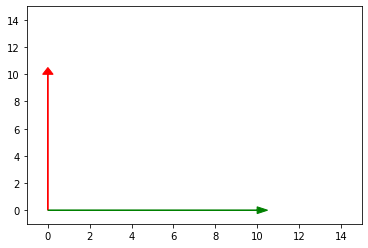

In [232]:
import matplotlib.pyplot as plt


vector_1 = [0, 10]
vector_2 = [10, 0]


plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.5, head_length=0.5, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.5, head_length=0.5, color ='green')
plt.xlim(-1,15)          
plt.ylim(-1,15)

plt.show()

Opposite? 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [239]:
a = [-5, 3, 7] 
b = [6, -8, 2]

np.prod(a) + np.prod(b)

-201

##Does not equal 0 therefore it will not have a 90 degree angle therefore it's not orthogonal

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [256]:
c = [2,-15,6,20]

from numpy import linalg as m 

m.norm(c)

25.787593916455254

In [257]:
np.dot(c,c)

665

In [263]:
c2 = np.array(c)
c2.T

array([  2, -15,   6,  20])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [269]:
f= [4,12,11,9,2]
#finding the norm
s = m.norm(f)
#multiply the norm with the array of numbers
s2 = np.array(f)
s2*s

array([ 76.52450588, 229.57351764, 210.44239117, 172.18013823,
        38.26225294])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

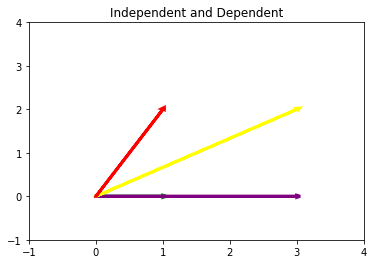

In [290]:

plt.xlim(-1,4)          
plt.ylim(-1,4)


v = (1,0)

v2 = (3, 2)
v3 = (1,2)
v4 = np.multiply(3, v)



plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0,v4[0], v4[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Independent and Dependent")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [294]:
g= np.array([[1,2],
             [4,8]])



np.linalg.det(g)

0.0

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [298]:
app = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

np.linalg.det(app)

-19.999999999999996

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



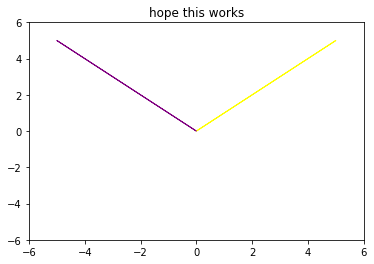

In [312]:
some = [5,0]

some1 = [0,5]

some2 = [5,5]

some3 = [-5,5]
#plt.arrow(0,0,some[0],some[1], color='blue')
#plt.arrow(0,0,some1[0],some1[1], color='green')
plt.arrow(0,0,some2[0],some2[1], color='yellow')
plt.arrow(0,0,some3[0],some3[1], color='purple')


plt.xlim(-6,6)          
plt.ylim(-6,6)

plt.title("hope this works")
plt.show()

## 6.2 What does it mean to form a basis?

To Form a independently spanning set of coordinates 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [321]:
p = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

from numpy.linalg import matrix_rank

matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

how many independent row or columns vectors we have in a matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

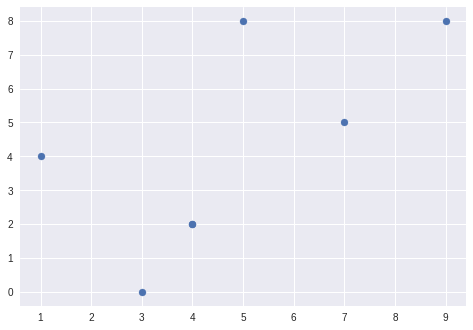

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()